## Complete Text Processing 

### **A. General Feature Extraction**
- File loading
- Word counts
- Characters count
- Average characters per word
- Stop words count
- Count #HashTags and @Mentions
- If numeric digits are present in tweets
- Upper case word counts

### **B. Preprocessing and Cleaning**
- Lower case
- Contraction to Expansion
- Emails removal and counts
- URLs removal and counts
- Removal of RT
- Removal of Special Characters
- Removal of multiple spaces
- Removal of HTML tags
- Removal of accented characters
- Removal of Stop Words
- Conversion into base form of words
- Common Occuring words Removal
- Rare Occuring words Removal
- Word Cloud
- Spelling Correction
- Tokenization
- Lemmatization
- Detecting Entities using NER
- Noun Detection
- N-Gram, Word Count, Lemmatization and POS Tagging
- Using Inbuilt Sentiment Classifier
- Sentence Translation
- Language Detection


### **A. General Feature Extraction**

### 1. Data Loader

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
url = 'https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/master/twitter4000.csv'
df = pd.read_csv(url)

In [3]:
df.head()

df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweets     4000 non-null   object
 1   sentiment  4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


tweets       0
sentiment    0
dtype: int64

In [4]:
df['sentiment'].value_counts()

sentiment
0    2000
1    2000
Name: count, dtype: int64

In [5]:
df.head()


,tweets,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


### 2. Characters Count

In [6]:
text = 'this is a simple   text'
len(text.replace(' ', ''))

17

In [7]:
pattern = r'\s'
re.sub(pattern, '', text)

'thisisasimpletext'

In [8]:
df['char_counts'] = df['tweets'].apply(lambda x: len(re.sub(pattern, '', x)))
df.sample(5)

,tweets,sentiment,char_counts
3869,@tommcfly what about MTV movie awards? Turn th...,1,54
3144,"Thanks for that, your just too good to me I ...",1,109
387,"@uscweetie wish I could go to the bbq, have me...",0,49
3803,@YoungCash Awwwww so sweet!!!!,1,27
2599,watching Discovery Channel *-* and getting rea...,1,53


### 3. Word Counts

In [9]:
x = 'this is sample text   data'
len(x.split())

5

In [10]:
df['word_counts'] = df['tweets'].apply(lambda x: len(x.split()))

In [11]:
df.sample(5)

,tweets,sentiment,char_counts,word_counts
2553,@grant78uk ya I know what you mean on that for...,1,107,27
3175,its raining! im on my emo mode now.,1,28,8
2218,Me and my dad finally got the little kiddy poo...,1,80,21
3174,Today I finally put the laker flag on my car &...,1,54,15
3911,@melbrehl Yeh I was like that it will wear of...,1,54,14


### 4. Average Word Length

In [12]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

In [13]:
df['avg_word_len'] = df['avg_word_len'].apply(lambda x: round(x, 1))

In [14]:
df.sample(5)

,tweets,sentiment,char_counts,word_counts,avg_word_len
2786,@OneNil same thing. as long as there's words.,1,38,8,4.8
2660,@G_Fresh31 happy birrthday!!,1,26,3,8.7
3051,@janetconner I didn't catch yours? You might b...,1,95,22,4.3
3409,@iggietoo Spry Samples: http://labs.adobe.co...,1,87,8,10.9
1913,7:25 PM.. I had a final exam today... and I st...,0,78,21,3.7


### 5. Stop Words Count 

In [19]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [22]:
len(stopwords)

326

In [25]:
x = "This is an example text data. let's use this"
len([word for word in x.lower().split() if word in stopwords])

4

In [27]:
df['stop_words_len'] = df['tweets'].apply(lambda x: len([word for word in x.lower().split() if word in stopwords]))

In [29]:
df.sample(5)

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len
675,Fixing an old USB mouse GPS that apparently ha...,0,102,25,4.1,13
1119,Aw no izzy from greys is dieing. She's one of ...,0,101,23,4.4,10
3238,Dancing To Lady Gaga In My Undiess Summmeeer...,1,48,11,4.4,5
26,Missin the wifeyy like no other,0,26,6,4.3,3
3316,@waaaida hahaha. balum. i will though. after p...,1,47,8,5.9,3


### 6. Count #HashTags and @Mentions 

In [39]:
x = 'this is #awe #some. thank you @laxmimerit'

In [44]:
len(re.findall(r'#\w+', x)), len(re.findall(r'@\w+', x))

(2, 1)

In [46]:
df['hashtags_count'] = df['tweets'].apply(lambda x: len(re.findall(r'#\w+', x)))
df['mentions_count'] = df['tweets'].apply(lambda x: len(re.findall(r'@\w+', x)))

In [48]:
df['hashtags_count'].value_counts()

hashtags_count
0    3912
1      73
2      13
3       2
Name: count, dtype: int64

In [49]:
df[df['hashtags_count']>0]

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
225,Already sent two or three one-forties without ...,0,117,21,5.6,6,1,0
343,"@colderICE will listening from my phone today,...",0,111,25,4.4,12,1,1
427,we want API! http://tinyurl.com/o49vf9 #wolfra...,0,109,12,9.1,2,1,0
468,Stupid bus broke down so will be late to googl...,0,57,14,4.1,6,2,0
475,@Restrictor I can only imagine what it might h...,0,113,23,4.9,11,1,1
...,...,...,...,...,...,...,...,...
3938,#DMCwmnSHOW enjoying the show very much from s...,1,44,8,5.5,5,1,0
3940,At #nfjs Denver! Please indulge me a whole mes...,1,88,16,5.5,7,1,0
3941,#assassinate is also trending because #spymast...,1,65,10,6.5,4,2,0
3944,@darrellferguson If you like Joss Whedon - che...,1,98,21,4.7,8,1,1


### 7. If numeric digits are present in tweets

In [59]:
x = 'this tweet has 3 numbers: 10 and 28989'
re.findall(r'\d+', x)


x = 'I want coupon code for product KGP2312AU43 and KGP1243RT. I need 10 pcs.'
re.findall(r'\b\d+\b', x)

['10']

In [61]:
df['numeric_count'] = df['tweets'].apply(lambda x: len(re.findall(r'\b\d+\b', x)))

In [64]:
df[df['numeric_count']>0].sample(5)

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count
1899,I hate saying goodbye. Ugh &lt;3 Ducky,0,32,7,4.6,1,0,0,1
209,AT&amp;T: &quot;you have 4 bars of 3G. oh wait...,0,105,22,4.8,7,0,0,2
2821,@marisaswart that makes 2 of us..,1,28,6,4.7,2,0,1,1
989,so incredibly stressed out ; don't let em get...,0,102,22,4.6,8,0,0,1
125,@MasterAwesome 23 almost 24 im an old lady,0,35,8,4.4,2,0,1,2


### 8. UPPER case words count 

In [68]:
x = 'I AM happy today'

In [69]:
[word for word in x.split() if word.isupper()], len([word for word in x.split() if word.isupper()])

(['I', 'AM'], 2)

In [72]:
df['upper_counts'] = df['tweets'].apply(lambda x: len([word for word in x.split() if word.isupper()]))

In [78]:
df[df['upper_counts']>3].iloc[0]['tweets']

"@jsong77  NOT DONE IT'S ALMOST 2 AM  this youtbe better start acting normaal"

In [79]:
df[df['upper_counts']>0].sample(5)

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts
450,Everything is broken - and people are annoyed ...,0,55,13,4.2,6,0,0,0,1
2563,@BACONDSC where?!!?,1,18,2,9.0,0,0,1,0,1
719,I wish there was an AT&amp;T OLED-screen phone...,0,121,25,4.8,13,0,0,0,2
3344,I looooove Ace of Cakes! Catching up on it at ...,1,40,11,3.6,6,0,0,0,1
2256,@Barbichick BTW - Saw that you befriended Metr...,1,96,20,4.8,7,0,1,0,1


### **B. Preprocessing and Cleaning**

### 9. Lower Case Conversion 

In [85]:
x = 'IS bored and wants to watch a movie        any sugge '
x.lower()

re.sub(r'\s+', ' ', x).lower()

'is bored and wants to watch a movie any sugge '

In [87]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'\s+', ' ', x).lower())

In [88]:
df.head()

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts
0,is bored and wants to watch a movie any sugges...,0,43,10,4.3,5,0,0,0,0
1,back in miami. waiting to unboard ship,0,32,7,4.6,3,0,0,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,54,12,4.5,1,0,1,0,1
3,ughhh i am so tired blahhhhhhhhh,0,27,6,4.5,3,0,0,0,0
4,@mandagoforth me bad! it's funny though. zacha...,0,116,26,4.5,13,0,1,0,0


### 10. Contraction to Expansion 

In [91]:
import json

contractions = json.load(open('data/contractions.json'))


In [95]:
contractions.get("don't")

'do not'

In [92]:
x = "don't mess with me. I'm done with this stuff."
[contractions.get(word, word) for word in x.split()]

["don't", 'mess', 'with', 'me.', "I'm", 'done', 'with', 'this', 'stuff.']

In [100]:
" ".join([contractions.get(word.lower(), word) for word in x.split()])

'do not mess with me. i am done with this stuff.'

In [101]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([contractions.get(word.lower(), word) for word in x.split()]))

In [105]:
df[df['tweets'].str.contains("don't")]

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts
482,making myself ready for school...don't feel li...,0,63,12,5.2,5,0,0,0,0
1259,"@dougiemcfly own,don't do that,i'm sure it was...",0,52,9,5.8,2,0,1,0,0
3729,@worldofhiglet i do not think it makes you see...,1,114,22,5.2,11,0,1,0,1


### 11. Count and Remove Emails 

In [118]:
x = 'contact me at udemy@kgptalkie.com and info@kgptalkie.com'

pattern = r'\w+@\w+.\w+'
result = re.findall(pattern=pattern, string=x)
print(result)

['udemy@kgptalkie.com', 'info@kgptalkie.com']


In [119]:
x = 'contact me at udemy@kgptalkie.com and info@kgptalkie.co.in'

pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
result = re.findall(pattern=pattern, string=x)
print(result)

['udemy@kgptalkie.com', 'info@kgptalkie.co.in']


In [122]:
df['emails'] = df['tweets'].apply(lambda x: ",".join(re.findall(pattern=pattern, string=x)))

In [123]:
df['emails'].value_counts()

emails
                               3999
markbradbury_16@hotmail.com       1
Name: count, dtype: int64

In [129]:
x = ''
x.count(',')+1 if len(x)>0 else 0

0

In [131]:
df['emails_count'] = df['emails'].apply(lambda x: x.count(',')+1 if len(x)>0 else 0)

In [132]:
df['emails_count'].value_counts()

emails_count
0    3999
1       1
Name: count, dtype: int64

In [137]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x))

### 12. Count and Remove URLs

In [144]:
x = 'Check this link: https://kgptalkie.com and www.kgptalkie.com'

pattern = r"http\S+|www\.\S+"
re.findall(pattern, x)

['https://kgptalkie.com', 'www.kgptalkie.com']

In [146]:
df['urls'] = df['tweets'].apply(lambda x: re.findall(pattern, x))

In [148]:
df['urls'].value_counts()

df['urls_count'] = df['urls'].apply(lambda x: len(x))

In [151]:
df[df['urls_count']>0].head()

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls,urls_count
16,@brianquest i made 1 fo you 2: http://bit.ly/e...,0,81,19,4.3,6,0,1,2,3,,0,[http://bit.ly/eid8a],1
98,heading to work http://twitpic.com/4eojz,0,37,4,9.2,1,0,0,0,0,,0,[http://twitpic.com/4eojz],1
99,@blondeblogger http://twitpic.com/4w8hk - i am...,0,62,10,6.2,4,0,1,0,0,,0,[http://twitpic.com/4w8hk],1
144,i miss you â« http://blip.fm/~8lc2f,0,32,5,6.4,2,0,0,0,1,,0,[http://blip.fm/~8lc2f],1
183,photo: miss germany http://tumblr.com/xf825f012,0,44,4,11.0,0,0,0,0,0,,0,[http://tumblr.com/xf825f012],1


In [152]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x))

In [153]:
df[df['urls_count']>0].head()

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls,urls_count
16,@brianquest i made 1 fo you 2: i tried but it...,0,81,19,4.3,6,0,1,2,3,,0,[http://bit.ly/eid8a],1
98,heading to work,0,37,4,9.2,1,0,0,0,0,,0,[http://twitpic.com/4eojz],1
99,@blondeblogger - i am so sad this is so blurry!,0,62,10,6.2,4,0,1,0,0,,0,[http://twitpic.com/4w8hk],1
144,i miss you â«,0,32,5,6.4,2,0,0,0,1,,0,[http://blip.fm/~8lc2f],1
183,photo: miss germany,0,44,4,11.0,0,0,0,0,0,,0,[http://tumblr.com/xf825f012],1


### 13. Remove RT 

In [155]:
x = 'RT @laxmimerit: this is a retweet'

In [164]:
pattern = r'\bRT @\w+'

re.findall(pattern, x), re.sub(pattern, '', x)

(['RT @laxmimerit'], ': this is a retweet')

In [158]:
bool(len(re.findall(pattern, x)))

True

In [159]:
df['is_retweet'] = df['tweets'].apply(lambda x: bool(len(re.findall(pattern, x))))

In [161]:
df['is_retweet'].sum()

0

In [162]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x))

### 14. Remove HTML tags

In [15]:
# !pip install beautifulsoup4==3.2.2

In [174]:
x = '<meta property="og:title" content="How to Become a Successful Machine Learning Engineer - KGP Talkie" />'

In [166]:
from bs4 import BeautifulSoup

In [167]:
soup = BeautifulSoup(x, 'lxml')

In [178]:
soup.find('meta')['content']

'How to Become a Successful Machine Learning Engineer - KGP Talkie'

In [179]:
x = '<p>To become a successful machine learning engineer, you need to have a solid foundation of technical skills. This includes proficiency in programming languages like Python and R, as well as knowledge of machine learning frameworks like TensorFlow and PyTorch. Additionally, you should be familiar with data analysis tools like SQL and Excel.</p>'

soup = BeautifulSoup(x, 'lxml')

In [180]:
soup.get_text()

'To become a successful machine learning engineer, you need to have a solid foundation of technical skills. This includes proficiency in programming languages like Python and R, as well as knowledge of machine learning frameworks like TensorFlow and PyTorch. Additionally, you should be familiar with data analysis tools like SQL and Excel.'

In [184]:
df['tweets'] = df['tweets'].apply(lambda x: BeautifulSoup('<p>'+x+'</p>', 'lxml').get_text())

In [185]:
df.head()

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls,urls_count,is_retweet
0,is bored and wants to watch a movie any sugges...,0,43,10,4.3,5,0,0,0,0,,0,[],0,False
1,back in miami. waiting to unboard ship,0,32,7,4.6,3,0,0,0,0,,0,[],0,False
2,@misskpey awwww dnt this bring back at keyboar...,0,54,12,4.5,1,0,1,0,1,,0,[],0,False
3,ughhh i am so tired blahhhhhhhhh,0,27,6,4.5,3,0,0,0,0,,0,[],0,False
4,@mandagoforth me bad! it is funny though. zach...,0,116,26,4.5,13,0,1,0,0,,0,[],0,False


### 15. Remove Accented Chars 

In [189]:
import unicodedata

x = 'à, è, ì, ò, ù, À, È, Ì, Ò, Ù'

unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')

'a, e, i, o, u, A, E, I, O, U'

In [191]:
df['tweets'] = df['tweets'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

### 16. Special Chars removal or punctuation removal 

In [197]:
x = '@misskpey awwww dnt this bring back at #keyboard!'

pattern = r'@\w+'
re.findall(pattern, x)
x = re.sub(pattern, '', x).strip()
x

'awwww dnt this bring back at #keyboard!'

In [198]:
# [^A-Za-z0-9-]
# [^\w\s]

pattern = r'[^\w\s]'
re.sub(pattern, '', x)

'awwww dnt this bring back at keyboard'

In [203]:
pattern = r'@\w+'
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x).strip())

In [204]:
pattern = r'[^\w\s]'
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x))

### 17. Remove Repeated Characters

In [215]:
x = 'lovvvvvvvveeeeeeeeee youuuuuuuuu' # love you

pattern = r'(.)\1+'

re.sub(pattern, r'\1', x)
re.sub(pattern, r'\1\1', x)

'lovvee youu'

In [214]:
x = 'success' # love you

pattern = r'(.)\1+'

re.sub(pattern, r'\1\1', x)

'success'

In [219]:
pattern = r'(.)\1+'
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, r'\1\1', x))

### 18. Remove Stop Words 

In [222]:
len(stopwords)

326

In [226]:
x = 'this is a sample sentence with the stop words. this that and so many stuff.'
' '.join([word for word in x.split() if word not in stopwords])

'sample sentence stop words. stuff.'

In [229]:
df['tweets_no_stop'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [232]:
df.sample(1)

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls,urls_count,is_retweet,tweets_no_stop
515,missed the 7o4 radio show for work and sick ki...,0,92,22,4.2,10,0,0,0,1,,0,[],0,False,missed 7o4 radio work sick kiddo waiting hear ...


### 19. Convert into base or root form of word 

In [238]:
import spacy

nlp = spacy.load('en_core_web_sm')

x = 'The dogs and cats are playing. Children are going to school.'
doc = nlp(x)

for token in doc:
    if token.pos_ in ['NOUN', 'VERB']:
        print(token.pos_, token.lemma_)

NOUN dog
NOUN cat
VERB play
NOUN child
VERB go
NOUN school


In [247]:
x = 'The dogs and cats are playing. Children are going to school.'


def lemmatize_noun_verb(x):
    doc = nlp(x)
    tokens = []
    for token in doc:
        if token.pos_ in ['NOUN', 'VERB']:
            tokens.append(token.lemma_)
        else:
            tokens.append(token.text)

    x = ' '.join(tokens)
    pattern = r'\s\.'
    x = re.sub(pattern, '.', x)
    return x


lemmatize_noun_verb(x)

'The dog and cat are play. child are go to school.'

In [249]:
# df['tweets'].apply(lambda x: lemmatize_noun_verb(x))
df['base_tweets'] = df['tweets'].apply(lemmatize_noun_verb)

In [256]:
df[df['base_tweets'] != df['tweets']].iloc[1]

tweets            back in miami waiting to unboard ship
sentiment                                             0
char_counts                                          32
word_counts                                           7
avg_word_len                                        4.6
stop_words_len                                        3
hashtags_count                                        0
mentions_count                                        0
numeric_count                                         0
upper_counts                                          0
emails                                                 
emails_count                                          0
urls                                                 []
urls_count                                            0
is_retweet                                        False
tweets_no_stop               miami waiting unboard ship
base_tweets          back in miami wait to unboard ship
Name: 1, dtype: object

### 20. Common words removal 

In [266]:
x = ' '.join(df['tweets_no_stop'].tolist())
words = x.split()

In [267]:
from collections import Counter

In [268]:
word_freq = Counter(words)

In [275]:
top10 = [word[0] for word in word_freq.most_common(10)]
print(top10)

['day', 'good', 'today', 'like', 'love', 'got', 'work', 'going', 'time', 'know']


In [276]:
df['no_common_tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in top10]))

### 21. Rare words removal 

In [286]:
least10 = [word[0] for word in word_freq.most_common()[-11:]]
print(least10)

['yeahneeded', 'earlysafdars', '740am', 'diversity', 'cw', 'dropping', 'provide', 'heyhey', 'colin', 'templating', 'rerunlovin']


In [287]:
df['no_least_tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in least10]))

### 22. Word Cloud Visualization 

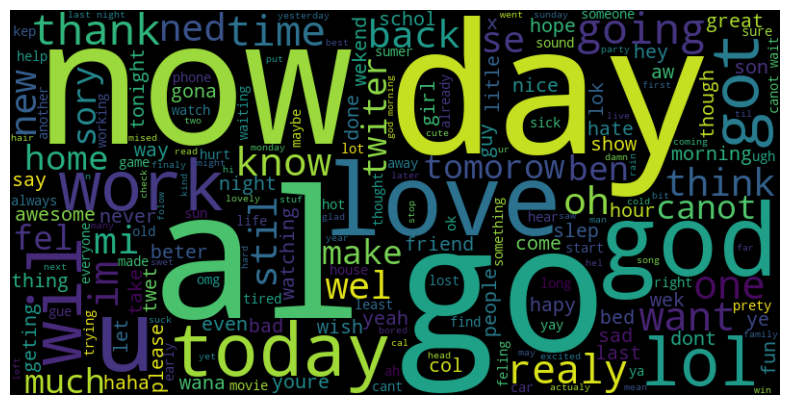

In [289]:
# pip install wordcloud==1.9.3

In [290]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

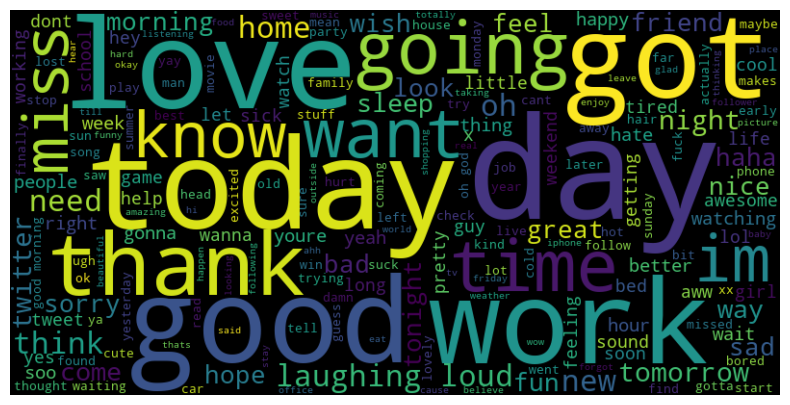

In [303]:
x = ' '.join(df['tweets_no_stop'].tolist())

cloud = WordCloud(width=800, height=400).generate(x)

plt.figure(dpi=100, figsize=(10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

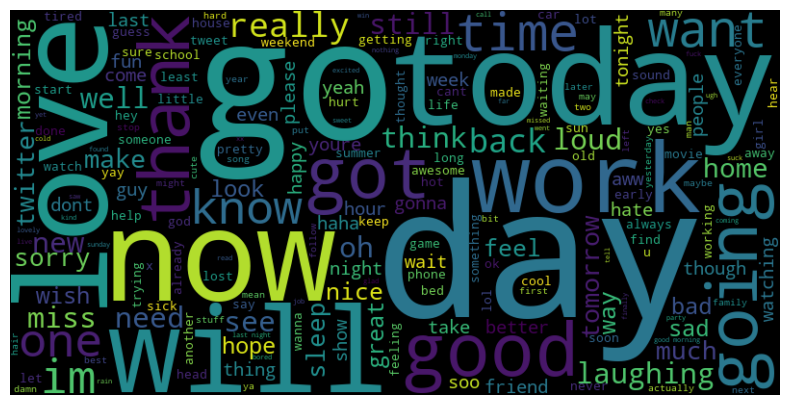

In [304]:
x = ' '.join(df['tweets'].tolist())

cloud = WordCloud(width=800, height=400).generate(x)

plt.figure(dpi=100, figsize=(10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 23. Spelling Correction 

In [17]:
# !pip install -U textblob==0.18.0.post0
# !python -m textblob.download_corpora

In [306]:
from textblob import Word

x = 'abbility'
w = Word(x)
w.spellcheck()

[('ability', 1.0)]

In [307]:
x = 'xake'
w = Word(x)
w.spellcheck()

[('take', 0.4797507788161994),
 ('make', 0.3925233644859813),
 ('sake', 0.07554517133956386),
 ('wake', 0.02102803738317757),
 ('lake', 0.02102803738317757),
 ('cake', 0.004672897196261682),
 ('rake', 0.003115264797507788),
 ('bake', 0.001557632398753894),
 ('jake', 0.000778816199376947)]

In [315]:
x = 'lovvvvvvvveeeeeeeeee youuuuuuuuu' # love you

pattern = r'(.)\1+'

x = re.sub(pattern, r'\1\1', x)

print(x)

words = []
for word in x.split():
    w = Word(word)
    # print(w.correct())
    words.append(w.correct())

' '.join(words)

lovvee youu


'love you'

In [316]:
def correct(x):
    words = []
    for word in x.split():
        w = Word(word)
        # print(w.correct())
        words.append(w.correct())

    return ' '.join(words)

correct(x)

'love you'

In [322]:
data = df.sample(100, random_state=0)

In [324]:
data['correct_tweets'] = data['tweets'].apply(correct)

In [327]:
data[data['tweets'] != data['correct_tweets']][['tweets', 'correct_tweets']].head()

,tweets,correct_tweets
3616,holy shiatsu i got a freakin b in physics than...,holy shirts i got a breaking b in physics than...
142,wants to go to the confirmation today but cant x,wants to go to the confirmation today but can x
538,i wish gossip girl was on,i wish gossip girl was on
1791,product of fundamentals class 300pm final exa...,product of fundamentals class 300pm final exam...
410,feel soo bad i got matty sick now i am at work...,feel so bad i got fatty sick now i am at work ...


### 24. Detecting Nouns Chunks and Phrases

In [335]:
from textblob import TextBlob

x= 'My goodness, what a delightful establishment with such wonderful individuals working there. The staff was exceptionally friendly and accommodating. I had intended to trade in my Apple MacBook Air M1 for the most recent M3 Air, but unfortunately, the store was quite crowded, and I was unable to do so. Despite this minor inconvenience, I must say that my overall experience was quite enjoyable.'

blob = TextBlob(x)
noun_phrase = blob.noun_phrases

noun_phrase

WordList(['delightful establishment', 'such wonderful individuals', 'apple macbook', 'm1', 'm3', 'minor inconvenience', 'overall experience'])

In [332]:
doc = nlp(x)

noun_chunks = [chunk.text for chunk in doc.noun_chunks]
noun_chunks

['My goodness',
 'what a delightful establishment',
 'such wonderful individuals',
 'The staff',
 'I',
 'my Apple MacBook Air M1',
 'the most recent M3 Air',
 'the store',
 'I',
 'this minor inconvenience',
 'I',
 'my overall experience']

In [337]:
data['noun_chunks'] = data['tweets'].apply(lambda x: TextBlob(x).noun_phrases)

In [339]:
data['noun_chunks'].value_counts()

noun_chunks
[]                                                           32
[blue sky, longmont tri, awesome volunteers, team jokaan]     1
[great walk, good results]                                    1
[show i]                                                      1
[vou virar gente]                                             1
                                                             ..
[happy monday]                                                1
[great i, disneyland i, work friday]                          1
[flat upwhy oh]                                               1
[hahaha o diba status status lang, ka na haha]                1
[great i hope, beautiful xx]                                  1
Name: count, Length: 69, dtype: int64

### 25. N-Gram, Word Counts, Singularize, Pluralize, Lemmatize and so much more

In [340]:
x = 'Cats and Dogs are playing together. Cats are running faster than dogs. The Ox is playing with men.'

In [342]:
blob = TextBlob(x)

In [354]:
['_'.join(word) for word in blob.ngrams(2)]
['_'.join(word) for word in blob.ngrams(3)]

['Cats_and_Dogs',
 'and_Dogs_are',
 'Dogs_are_playing',
 'are_playing_together',
 'playing_together_Cats',
 'together_Cats_are',
 'Cats_are_running',
 'are_running_faster',
 'running_faster_than',
 'faster_than_dogs',
 'than_dogs_The',
 'dogs_The_Ox',
 'The_Ox_is',
 'Ox_is_playing',
 'is_playing_with',
 'playing_with_men']

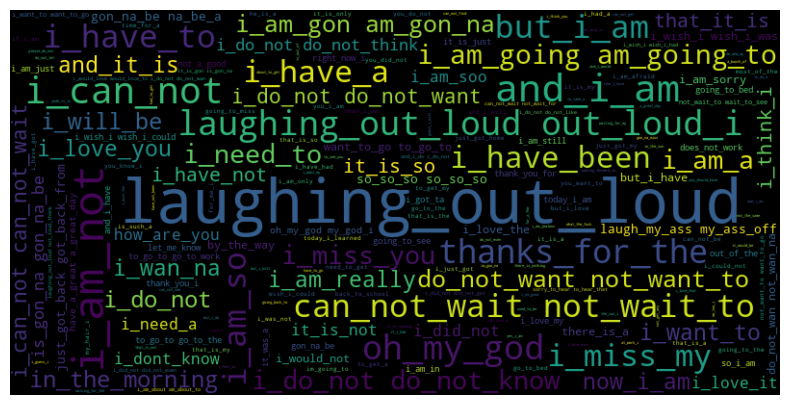

In [358]:
x = ' '.join(df['tweets'].tolist())
blob = TextBlob(x)
x = ' '.join(['_'.join(word) for word in blob.ngrams(3)])

cloud = WordCloud(width=800, height=400).generate(x)

plt.figure(dpi=100, figsize=(10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [370]:
x = 'Cats and Dogs are playing together. Cats are running faster than dogs. The Ox is playing with men. cat'
x = x.lower()

blob = TextBlob(x)

x.count('do')

pattern = r'\bcat\b'
len(re.findall(pattern, x))


1

In [374]:
blob.words.count('dog')

0

In [375]:
blob.words

WordList(['cats', 'and', 'dogs', 'are', 'playing', 'together', 'cats', 'are', 'running', 'faster', 'than', 'dogs', 'the', 'ox', 'is', 'playing', 'with', 'men', 'cat'])

In [381]:
print([word.singularize() if tag in ['NNS'] else word for word, tag in blob.tags])

['cat', 'and', 'dog', 'are', 'playing', 'together', 'cat', 'are', 'running', 'faster', 'than', 'dog', 'the', 'ox', 'is', 'playing', 'with', 'man', 'cat']


In [382]:
print([word.pluralize() if tag in ['NN'] else word for word, tag in blob.tags])

['cats', 'and', 'dogs', 'are', 'playing', 'together', 'cats', 'are', 'running', 'faster', 'than', 'dogs', 'the', 'oxen', 'is', 'playing', 'with', 'men', 'cats']


In [387]:
print([word.lemmatize('v') for word in blob.words])

['cat', 'and', 'dog', 'be', 'play', 'together', 'cat', 'be', 'run', 'faster', 'than', 'dog', 'the', 'ox', 'be', 'play', 'with', 'men', 'cat']


### 26. Use TextBlob's Inbuilt Sentiment Classifier 

In [389]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

x = 'we all stand together. we are gonna win this fight.'

blob = TextBlob(x, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.8948284226465963, p_neg=0.10517157735340235)

In [393]:
x = 'i do not like this'

blob = TextBlob(x, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='neg', p_pos=0.48478060149744384, p_neg=0.5152193985025563)

In [394]:
data = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/moviereviews.tsv', sep='\t')

In [396]:
data = data.sample(20, random_state=0)

In [399]:
data['pred'] = data['review'].apply(lambda x: TextBlob(x, analyzer=NaiveBayesAnalyzer()).sentiment.classification)

In [401]:
data.head()

,label,review,pred
405,neg,the original babe gets my vote as the best fam...,pos
1190,pos,the most amazing thing about paul cox's innoce...,pos
1132,pos,"part one of "" the strangest movies ever made ""...",pos
731,neg,movies don't come much more ridiculously title...,neg
1754,neg,this is the last carry on film with its almost...,neg


### 27. Language Translation and Detection

Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [ ]:
# pip install googletrans==4.0.0rc1

In [402]:
from googletrans import Translator

In [404]:
x = 'we all stand together. we are gonna win this fight.'
x = 'همه با هم می ایستیم ما در این مبارزه پیروز خواهیم شد'

translator = Translator()

translator.detect(x).lang

'fa'

In [408]:
# x = 'we all stand together. we are gonna win this fight.'
x = 'همه با هم می ایستیم ما در این مبارزه پیروز خواهیم شد'
translator.translate(x, dest='en').text

'We all stand together. We will win in this struggle'

In [410]:
x = 'we all stand together. we are gonna win this fight.'
translator.translate(x, dest='hi').text

'हम सभी एक साथ खड़े हैं।हम इस लड़ाई को जीतने वाले हैं।'